# HW 
- Use the cancer data used below (or the first two columns of the iris data set) - for bonus, bring your own data set
- Normalize, test-train split the data
- Train models from SVM (linear and rbf kernels), LogRegression (2 values of C), KNN (3 neighbor values)
- Create two tables, one for train, one for test - that represent the Model, description, Precision, Recall, f1 score on each line
- Pick one of the Models and show the feature importance

In [ ]:


%matplotlib inline

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
import sklearn.preprocessing

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica



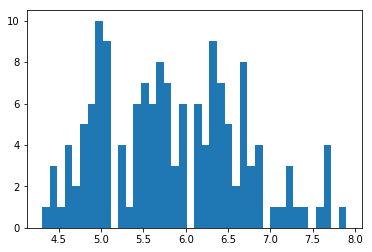

In [99]:
plt.hist(iris.data[:, 0], 40)
plt.show()

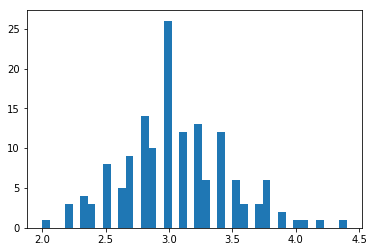

In [100]:
plt.hist(iris.data[:, 1], 40)
plt.show()

In [102]:
irisdf = pd.DataFrame(iris.data)

irisdf['target'] = iris.target

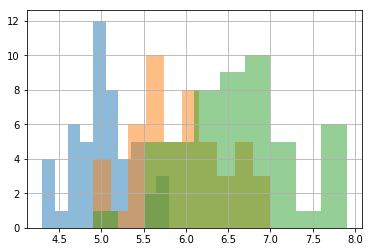

In [108]:
irisdf[irisdf.target==0][0].hist(alpha=.5)
irisdf[irisdf.target==1][0].hist(alpha=.5)
irisdf[irisdf.target==2][0].hist(alpha=.5)

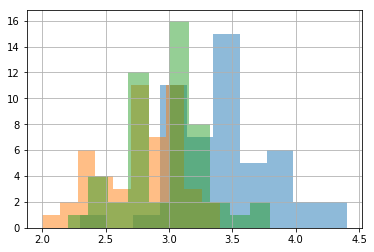

In [109]:
irisdf[irisdf.target==0][1].hist(alpha=.5)
irisdf[irisdf.target==1][1].hist(alpha=.5)
irisdf[irisdf.target==2][1].hist(alpha=.5)

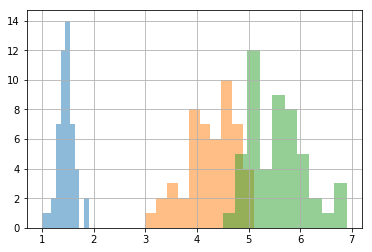

In [110]:
irisdf[irisdf.target==0][2].hist(alpha=.5)
irisdf[irisdf.target==1][2].hist(alpha=.5)
irisdf[irisdf.target==2][2].hist(alpha=.5)

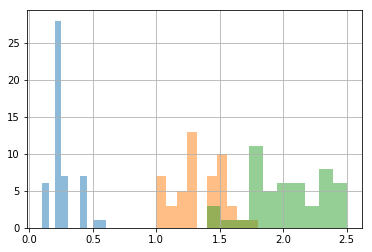

In [111]:
irisdf[irisdf.target==0][3].hist(alpha=.5)
irisdf[irisdf.target==1][3].hist(alpha=.5)
irisdf[irisdf.target==2][3].hist(alpha=.5)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.72      0.68      0.70        50
          2       0.70      0.74      0.72        50

avg / total       0.81      0.81      0.81       150

[[50  0  0]
 [ 0 34 16]
 [ 0 13 37]]


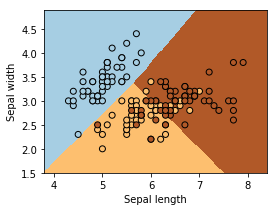

In [146]:

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)


print(classification_report(Y, logreg.predict(X)))
print(confusion_matrix(Y, logreg.predict(X)))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

In [149]:
logreg.predict_proba(X)>.9

array([[ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [ T

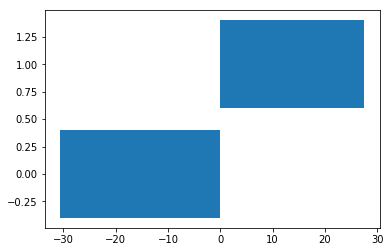

In [89]:
coef = logreg.coef_[0]
plt.barh(list(range(coef.shape[0])), coef, align='center')
# plt.yticks(range(len(X.columns)), X.columns)
plt.show()

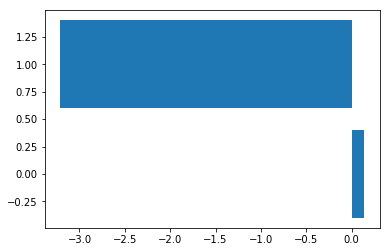

In [90]:
coef = logreg.coef_[1]
plt.barh(list(range(coef.shape[0])), coef, align='center')
# plt.yticks(range(len(X.columns)), X.columns)
plt.show()

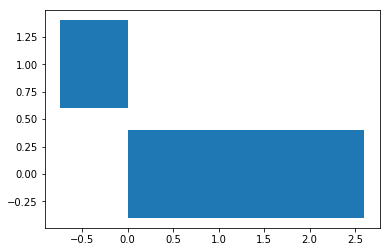

In [114]:
coef = logreg.coef_[2]
plt.barh(list(range(coef.shape[0])), coef, align='center')
# plt.yticks(range(len(X.columns)), X.columns)
plt.show()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.72      0.68      0.70        50
          2       0.70      0.74      0.72        50

avg / total       0.81      0.81      0.81       150

[[50  0  0]
 [ 0 34 16]
 [ 0 13 37]]


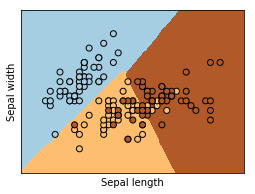

In [118]:

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

model = svm.SVC(kernel='linear')

# we create an instance of Neighbours Classifier and fit the data.
model.fit(X, Y)

print(classification_report(Y, logreg.predict(X)))
print(confusion_matrix(Y, logreg.predict(X)))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [4]:
import pandas as pd

In [7]:
cancer = pd.read_csv('../../data/wdbc.data', header=None)

In [8]:
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
cancer[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [119]:
Y = (cancer[1]=='M').astype(int)

In [139]:
X = cancer[[*range(2,31)]]

In [120]:
cancer_svm = svm.SVC(kernel = 'linear')

In [150]:
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)

In [143]:
cancer_svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
print(classification_report(Y, cancer_svm.predict(X)))
print(confusion_matrix(Y, cancer_svm.predict(X)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       357
          1       1.00      0.96      0.98       212

avg / total       0.98      0.98      0.98       569

[[356   1]
 [  9 203]]


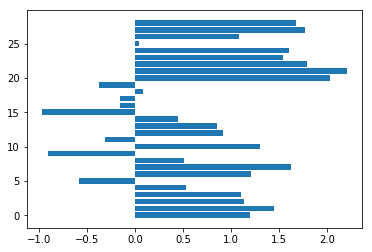

In [145]:
coef = cancer_svm.coef_[0]
plt.barh(list(range(coef.shape[0])), coef, align='center')
# plt.yticks(range(len(X.columns)), X.columns)
plt.show()

In [128]:
sklearn.preprocessing.normalize(X) #Don't use this

array([[  7.92541487e-03,   4.57286306e-03,   5.40989965e-02, ...,
          3.13624394e-04,   1.16920795e-04,   2.02695018e-04],
       [  8.66575595e-03,   7.48616837e-03,   5.59882823e-02, ...,
          1.01781558e-04,   7.83583183e-05,   1.15852352e-04],
       [  9.36668269e-03,   1.01087866e-02,   6.18419883e-02, ...,
          2.14258704e-04,   1.15596947e-04,   1.71873157e-04],
       ..., 
       [  1.16438847e-02,   1.96964025e-02,   7.59658260e-02, ...,
          2.38699636e-04,   9.94640271e-05,   1.55579134e-04],
       [  9.23020525e-03,   1.31418408e-02,   6.27743570e-02, ...,
          4.20601634e-04,   1.18738077e-04,   1.83125480e-04],
       [  2.31098885e-02,   7.30820443e-02,   1.42709518e-01, ...,
          0.00000000e+00,   0.00000000e+00,   8.55006313e-04]])